In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

**1.Reading Data**

In [2]:
df=pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


dataset  contains missing values need to handle the missing values.

In [4]:
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [5]:
df["horsepower"].replace("?",np.nan,inplace=True)

In [6]:
df["normalized-losses"].isnull().sum()

41

In [7]:
df["horsepower"].isnull().sum()

2

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


**2.Handling Missing Values with Simple Imputer**

In [9]:
from sklearn.impute import SimpleImputer 
si=SimpleImputer(missing_values=np.nan,strategy="mean") 
df[["normalized-losses","horsepower"]]=si.fit_transform(df[["normalized-losses","horsepower"]])
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


All Missing Values are handled 

**3.Handling Outliers**

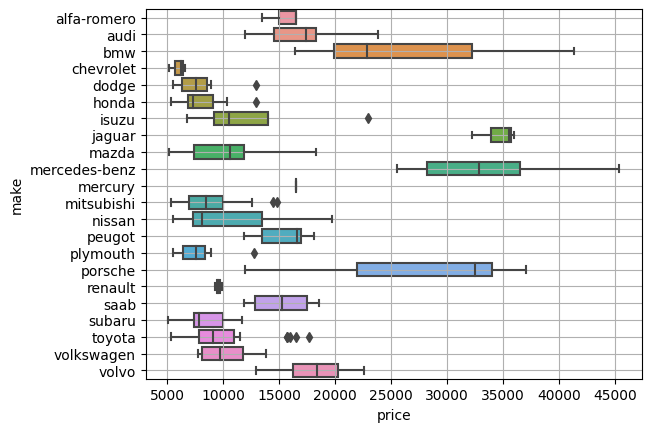

In [11]:
sns.boxplot(data=df.iloc[:,-1],x=df.iloc[:,-1],y=df["make"])
plt.grid()

In [12]:
df[(df.make=="dodge")&(df.price>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


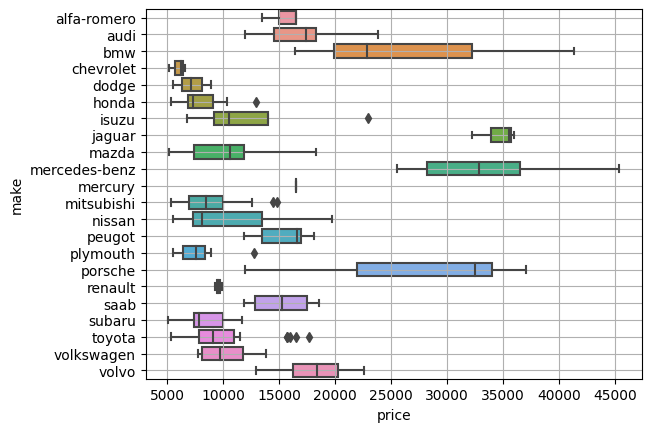

In [13]:
df.drop(29,axis=0,inplace=True)
sns.boxplot(data=df.iloc[:,-1],x=df.iloc[:,-1],y=df["make"])
plt.grid()

In [14]:
df[(df.make=="honda")&(df.price>12500)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


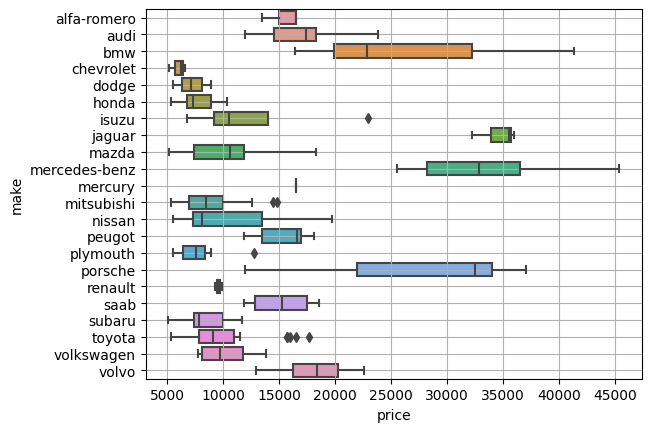

In [15]:
df.drop(41,axis=0,inplace=True)
sns.boxplot(data=df.iloc[:,:-1],x=df.iloc[:,-1],y="make")
plt.grid()

In [16]:
df[(df.make=="isuzu")&(df.price>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


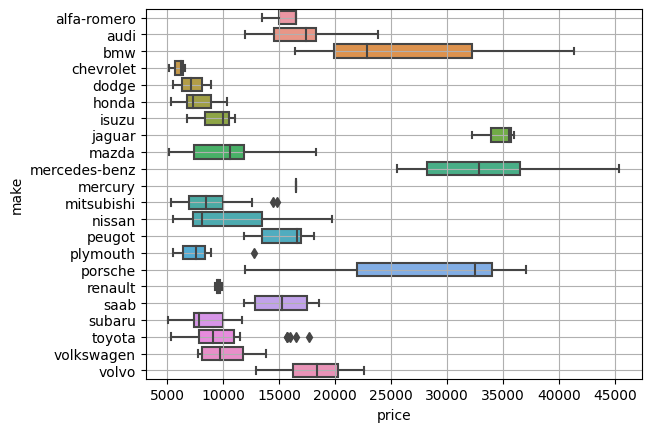

In [17]:
df.drop(45,axis=0,inplace=True)
sns.boxplot(data=df.iloc[:,:-1],x=df.iloc[:,-1],y="make")
plt.grid()

In [18]:
df[(df.make=="mitsubishi")&(df.price>12500)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
82,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12629
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


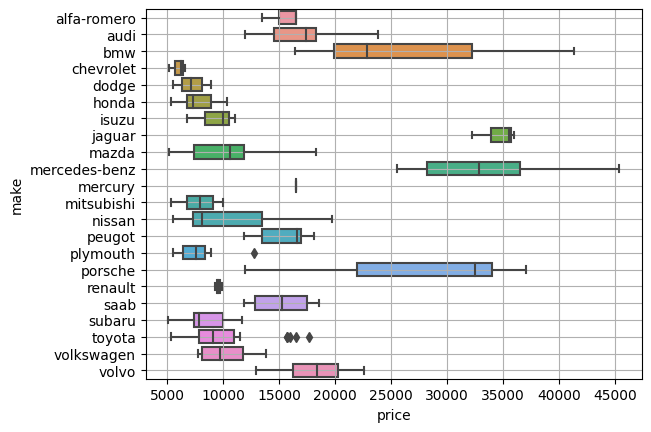

In [19]:
df.drop([82,83,84],axis=0,inplace=True)
sns.boxplot(data=df.iloc[:,:-1],x=df.iloc[:,-1],y="make")
plt.grid()

In [20]:
df[(df.make=="plymouth")&(df.price>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


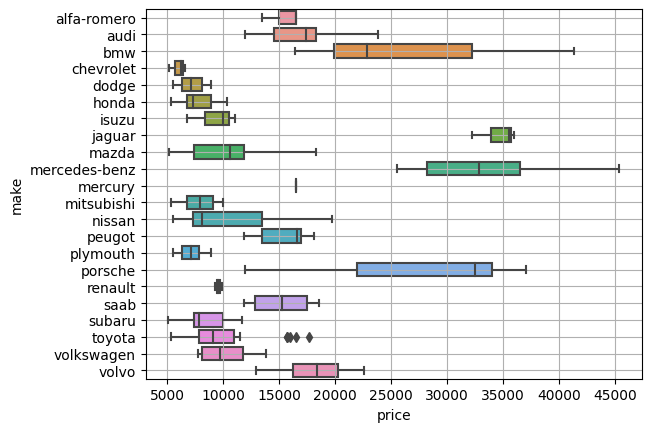

In [21]:
df.drop(124,axis=0,inplace=True)
sns.boxplot(data=df.iloc[:,:-1],x=df.iloc[:,-1],y="make")
plt.grid()

In [22]:
df[(df.make=="toyota")&(df.price>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


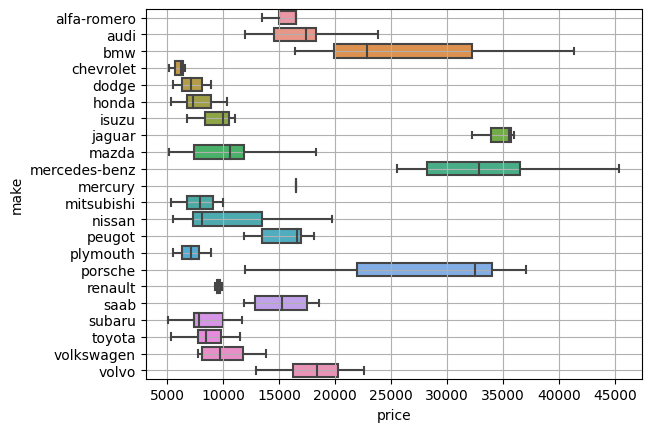

In [23]:
df.drop([172,178,179,180,181],axis=0,inplace=True)
sns.boxplot(data=df.iloc[:,:-1],x=df.iloc[:,-1],y="make")
plt.grid()

**4.Skewness Removal**

Here now we will split data into x & y

x==> Features/input

y==>Target/output

In [24]:
x=df.iloc[:,:-1]
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


In [25]:
y=df.iloc[:,-1]
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 193, dtype: int64

In [26]:
x.select_dtypes(["int64","float64"]).columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [27]:
colname=x.select_dtypes(["int64","float64"]).columns
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [28]:
from scipy.stats import skew
for i in x[colname]:
  print(i)
  print(skew(x[i]))

symboling
0.2147470605758054
normalized-losses
0.846315331460635
width
0.9147899492639983
height
0.007986794777796822
engine-size
2.0664919440355707
horsepower
1.576213559993105
city-mpg
0.5925146641287237
highway-mpg
0.4682909445793763


symboling
0.2147470605758054


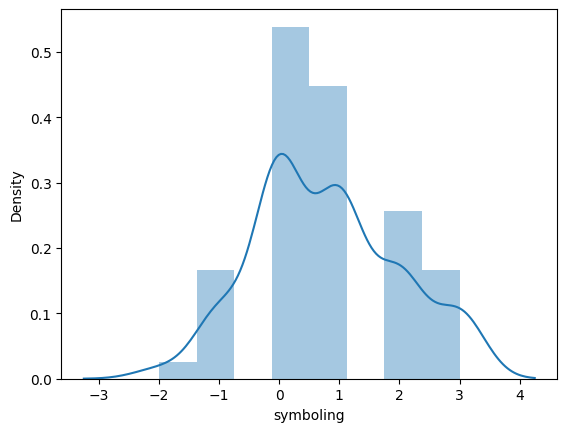

<Figure size 640x480 with 0 Axes>

normalized-losses
0.846315331460635


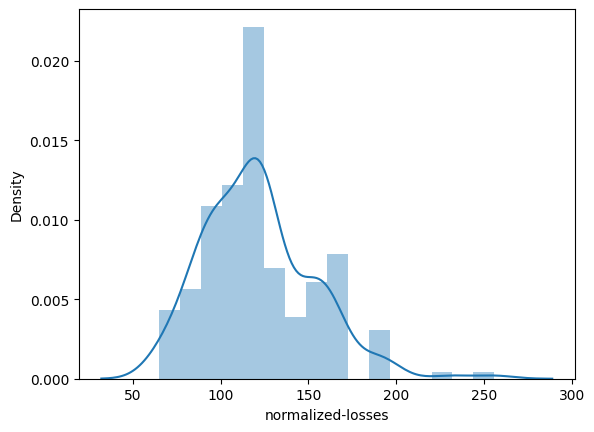

<Figure size 640x480 with 0 Axes>

width
0.9147899492639983


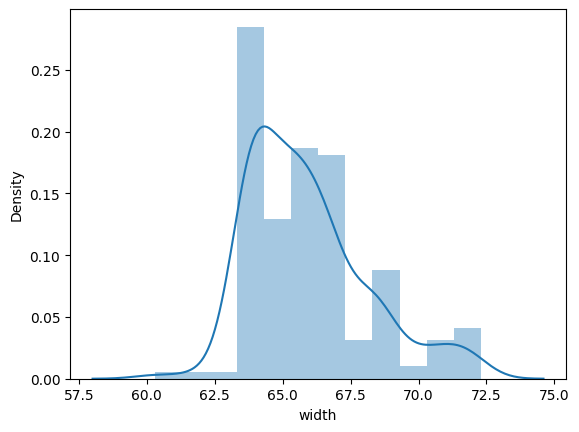

<Figure size 640x480 with 0 Axes>

height
0.007986794777796822


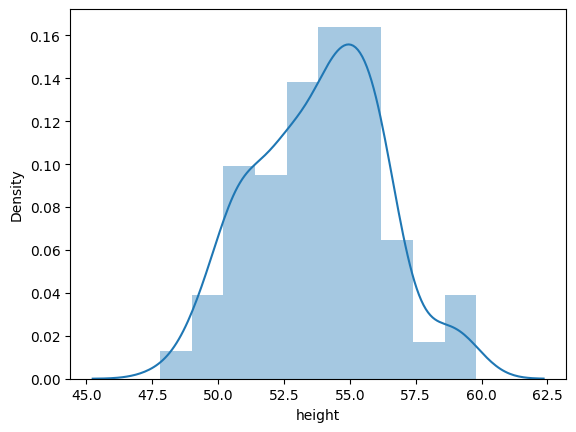

<Figure size 640x480 with 0 Axes>

engine-size
2.0664919440355707


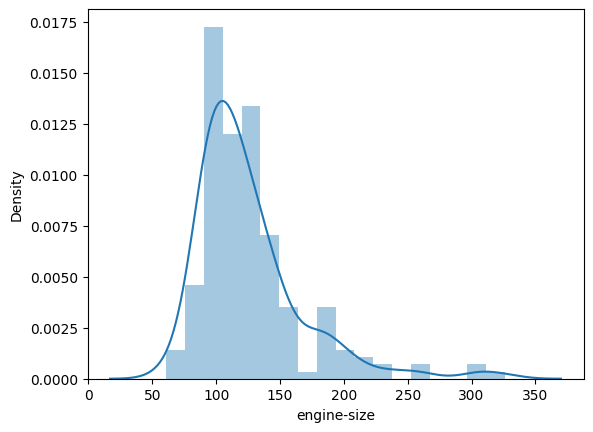

<Figure size 640x480 with 0 Axes>

horsepower
1.576213559993105


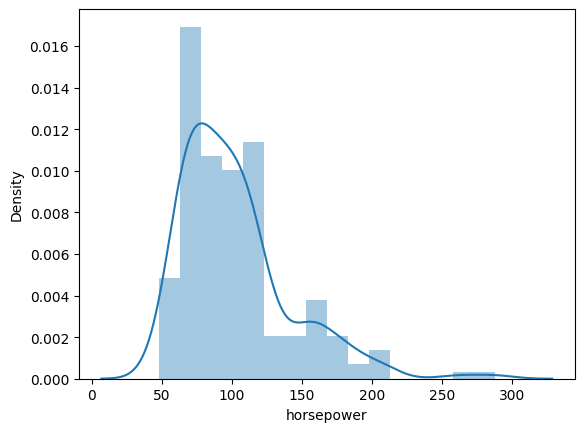

<Figure size 640x480 with 0 Axes>

city-mpg
0.5925146641287237


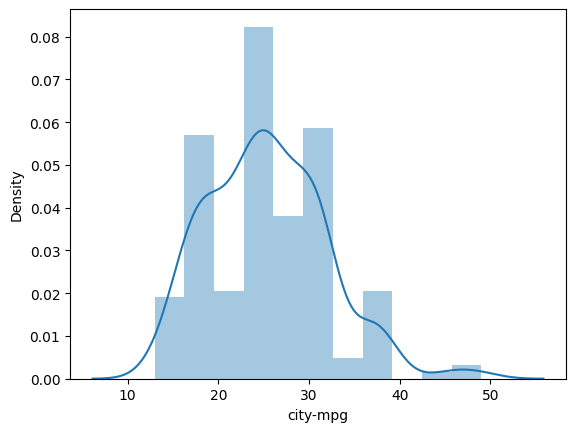

<Figure size 640x480 with 0 Axes>

highway-mpg
0.4682909445793763


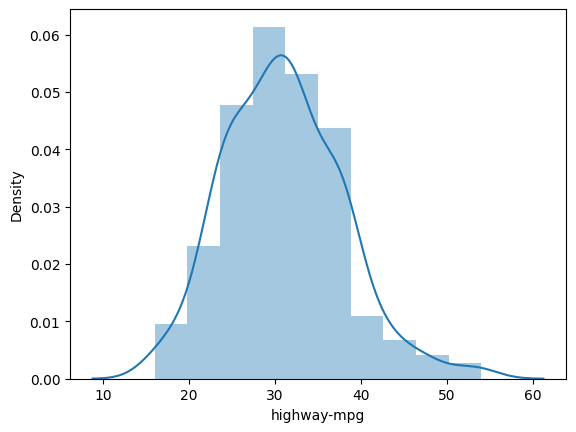

<Figure size 640x480 with 0 Axes>

In [29]:
for i in x[colname]:
  print(i)
  print(skew(x[i]))
  sns.distplot(x[i])
  plt.figure()
  plt.show()

In [30]:
df.corr()["price"].sort_values()

highway-mpg         -0.707051
city-mpg            -0.682415
symboling           -0.096215
normalized-losses    0.129980
height               0.147417
width                0.730630
horsepower           0.771608
engine-size          0.871044
price                1.000000
Name: price, dtype: float64

<Axes: >

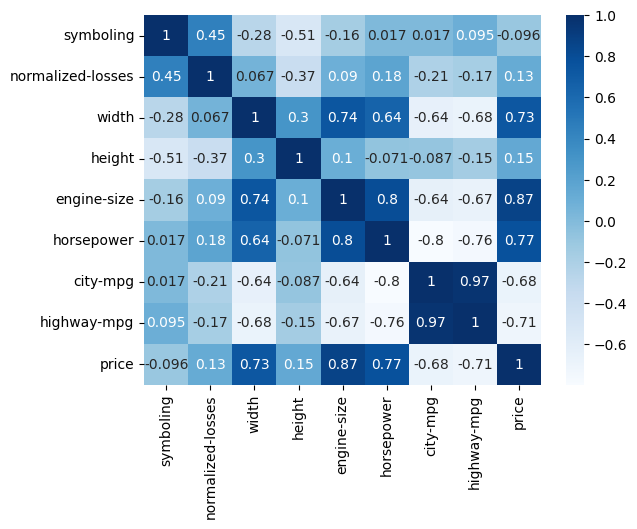

In [31]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

Form above we can see that there is need of removing skewness for normalized losses only.

In [32]:
np.log(x["normalized-losses"])

0      4.804021
1      4.804021
2      4.804021
3      5.099866
4      5.099866
         ...   
200    4.553877
201    4.553877
202    4.553877
203    4.553877
204    4.553877
Name: normalized-losses, Length: 193, dtype: float64

In [33]:
x["normalized-losses"]=np.log(x["normalized-losses"])
x.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


In [34]:
skew(x["normalized-losses"])

0.020674302162479046

Skewness is reduced for normalized-losses from 0.846 to 0.020

**5.Handling Categorical Data**

Now For creating the ML Model we need encode all the catergorical data.

This is done by:

1.Label Encoder (implemented to y i.e target/output only)

2.Ordinal Encoder (implemented to x i.e.features/Input only)

Here y is already numeric in nature.

but x has columns which are catergorical in nature. So we will use them for encoding.

In [35]:
x.select_dtypes(object).columns

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [36]:
catcol=x.select_dtypes(object).columns
catcol

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[catcol]=oe.fit_transform(x[catcol])
x.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22


**6.Feature Engineering**

In [38]:
x["width"]*x["height"]

0      3128.08
1      3128.08
2      3432.20
3      3594.66
4      3605.52
        ...   
200    3823.95
201    3818.40
202    3823.95
203    3823.95
204    3823.95
Length: 193, dtype: float64

In [39]:
x["area"]=x["width"]*x["height"]
x

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,3128.08
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,3128.08
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,3432.20
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,3594.66
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,3605.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,3823.95
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,3818.40
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,3823.95
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,3823.95


In [40]:
x.drop(["width","height"],axis=1,inplace=True)
x.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,0.0,130,111.0,21,27,3128.08
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,0.0,130,111.0,21,27,3128.08
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,5.0,152,154.0,19,26,3432.20
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,3.0,109,102.0,24,30,3594.66
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,3.0,136,115.0,18,22,3605.52


In [41]:
x.shape

(193, 13)

In [42]:
y.shape

(193,)

**7.Standard Scaler**

In [43]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
x=ss.fit_transform(x.to_numpy())
x

array([[ 1.86751348,  0.14653846, -1.93011318, ..., -0.68079631,
        -0.58580805, -1.85632772],
       [ 1.86751348,  0.14653846, -1.93011318, ..., -0.68079631,
        -0.58580805, -1.85632772],
       [ 0.18718667,  0.14653846, -1.93011318, ..., -0.9870753 ,
        -0.73150515, -0.51568599],
       ...,
       [-1.49314015, -0.8395623 ,  1.40866135, ..., -1.1402148 ,
        -1.16859647,  1.21125205],
       [-1.49314015, -0.8395623 ,  1.40866135, ...,  0.08490117,
        -0.58580805,  1.21125205],
       [-1.49314015, -0.8395623 ,  1.40866135, ..., -0.9870753 ,
        -0.87720226,  1.21125205]])

In [44]:
x_scaled=pd.DataFrame(x,columns=["symboling","normalized-losses","make","fuel-type","body-style","drive-wheels","engine-location","engine-type","engine-size","horsepower","city-mpg","highway-mpg","area"])
x_scaled.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,engine-size,horsepower,city-mpg,highway-mpg,area
0,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277,0.107874,0.224311,-0.680796,-0.585808,-1.856328
1,1.867513,0.146538,-1.930113,0.34001,-3.112000,1.229517,-0.125656,-3.103277,0.107874,0.224311,-0.680796,-0.585808,-1.856328
2,0.187187,0.146538,-1.930113,0.34001,-0.752016,1.229517,-0.125656,1.938242,0.631937,1.321612,-0.987075,-0.731505,-0.515686
3,1.027350,1.312799,-1.771124,0.34001,0.427976,-0.568186,-0.125656,-0.078366,-0.392369,-0.005357,-0.221378,-0.148717,0.200481
4,1.027350,1.312799,-1.771124,0.34001,0.427976,-2.365889,-0.125656,-0.078366,0.250800,0.326386,-1.140215,-1.314294,0.248355


**Here we have done all the data preprocessing steps.**